Importing neccesary libraryes 

In [1]:
import pandas as pd
import matplotlib .pyplot as plt
import numpy as np
import seaborn as sns


import nltk

read the dataset of business and user reviwes 

In [20]:
b_data = pd.read_json('yelp_academic_dataset_business.json',lines=True)
u_data = pd.read_json('yelp_academic_dataset_tip.json',lines=True)

In [21]:
b_data.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


help of pandas merge function we merge the two dataset behalf of "business_id" for better anylesis of perticuleer user reviews on product

In [22]:
data = pd.merge(b_data,u_data,on='business_id')

In [23]:
data.head(20)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,text,date,compliment_count
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",trf3Qcz8qvCDKXiTgjUcEg,Dropping off my Amazon return.,2011-12-12 23:30:26,0
1,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",_5swqa5xUdLar-Q-bBZSDA,Containers!,2012-03-29 18:47:55,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",oAvO0BOHOagOI7WVGXlWSA,This place looks the same as other target at c...,2012-12-11 02:50:41,0
3,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",moSLKqdFUI-B80vun67UfQ,"clean just stopped for some pens, not to busy ...",2014-09-21 23:01:02,0
4,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",8eC6EOsLTmfVk_35t3ZQqg,Butterball turkeys are 99 cents a pound right ...,2013-11-23 21:15:05,0
5,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",_5swqa5xUdLar-Q-bBZSDA,Water filters,2012-04-05 22:30:44,0
6,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",vn5qiAq8uihNPapCv6FJqA,They have cheap earphones...perfect for the gym!,2013-09-13 18:16:57,0
7,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",oAvO0BOHOagOI7WVGXlWSA,Its easy to shop here because its well stocked!,2012-12-15 20:01:59,0
8,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",i8mGJIjgJKYik1KcMy7DKw,Coupons,2012-09-07 01:29:27,0
9,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",WqeE5e5ROfaVEgkb9dAkiQ,Love their pastries and drinks!,2017-09-20 17:00:27,0


In [24]:
data['text'].values[0]

'Dropping off my Amazon return.'

Understanding the how many stars is given by product and their counts 

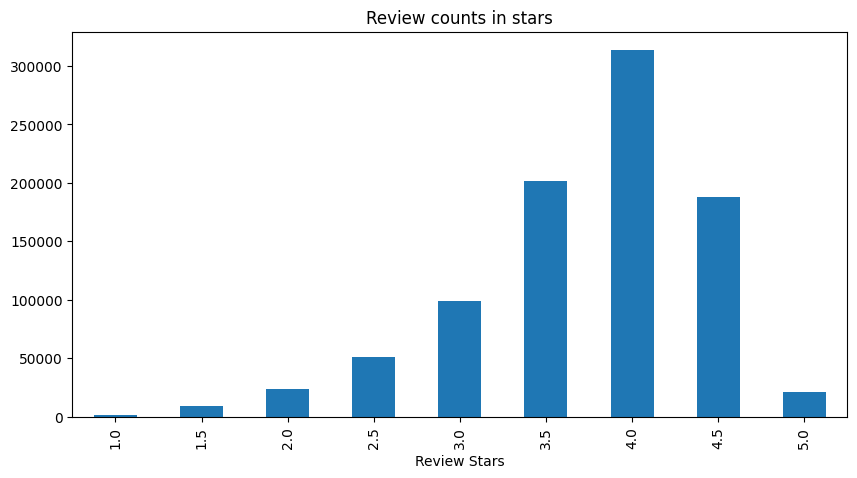

In [25]:
ax = data['stars'].value_counts().sort_index().plot(kind='bar',title="Review counts in stars",figsize=(10,5))
ax.set_xlabel("Review Stars")
plt.show()

in this we use VADER(Valence Aware Dictionary and sEntiment Reasoner) for anylesis of each word behalf of polarity scores 

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sen  = SentimentIntensityAnalyzer()

help of polarity scores we understand the each user review is postive , negative or neutral that  basic we anylesis of the sentiment anylesis 

In [27]:
res = {}
for i, row in tqdm(data.iterrows(),total=len(data)):
    text  = row['text']
    myid = row['user_id']
    res[myid] = sen.polarity_scores(text)
    


  0%|          | 0/908915 [00:00<?, ?it/s]

In [28]:
vader = pd.DataFrame(res).T
vader = vader.reset_index().rename(columns={'index': 'user_id'})
merged_data = pd.merge(vader,data,on='user_id')

in above code our polarity scores data is get by user review and user id and this hole data file we merge with our main dataset

In [29]:
merged_data

,user_id,neg,neu,pos,compound,business_id,name,address,city,state,...,longitude,stars,review_count,is_open,attributes,categories,hours,text,date,compliment_count
0,trf3Qcz8qvCDKXiTgjUcEg,0.0,0.722,0.278,0.4019,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,...,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",Dropping off my Amazon return.,2011-12-12 23:30:26,0
1,trf3Qcz8qvCDKXiTgjUcEg,0.0,0.722,0.278,0.4019,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,...,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,"First time here. So far, bread has no flavor,...",2012-06-15 02:35:12,0
2,trf3Qcz8qvCDKXiTgjUcEg,0.0,0.722,0.278,0.4019,lB6jIOb1UBATmdfot4KJew,Soco's Gyros,5530 S Lindbergh Blvd,Saint Louis,MO,...,-90.355678,4.0,126,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Delis, Kebab, Turkish, Mediterranean, Greek, R...","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...",Friendly counter girl today!,2012-10-09 20:35:47,0
3,trf3Qcz8qvCDKXiTgjUcEg,0.0,0.722,0.278,0.4019,lB6jIOb1UBATmdfot4KJew,Soco's Gyros,5530 S Lindbergh Blvd,Saint Louis,MO,...,-90.355678,4.0,126,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Delis, Kebab, Turkish, Mediterranean, Greek, R...","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...","One deluxe veggie wrap, please.",2012-10-05 19:34:14,0
4,trf3Qcz8qvCDKXiTgjUcEg,0.0,0.722,0.278,0.4019,lB6jIOb1UBATmdfot4KJew,Soco's Gyros,5530 S Lindbergh Blvd,Saint Louis,MO,...,-90.355678,4.0,126,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Delis, Kebab, Turkish, Mediterranean, Greek, R...","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...",Gold Peak Tea available.,2012-08-08 16:49:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908910,sqKWVIMXm1RGAlvVQYaiHw,0.0,1.000,0.000,0.0000,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,...,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Al Pastor Tacos,2017-11-18 19:33:07,0
908911,s6CilHlWWxqbu3Mr2r8MXg,0.0,0.519,0.481,0.5719,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,...,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Service and food were wonderful.,2018-10-21 23:56:27,0
908912,a-EQKCGPirfEd33MkbD4ug,0.0,0.625,0.375,0.8555,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,...,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",I love Mexican food and I've got to say this i...,2019-02-25 14:04:49,0
908913,dp7hYl5O3_o3b4Bta8_25g,0.0,0.809,0.191,0.4295,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,...,-75.427725,4.5,14,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Comfort Food, Food, Food Trucks, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",The goat curry has great flavor but beware of ...,2015-06-19 12:40:16,0


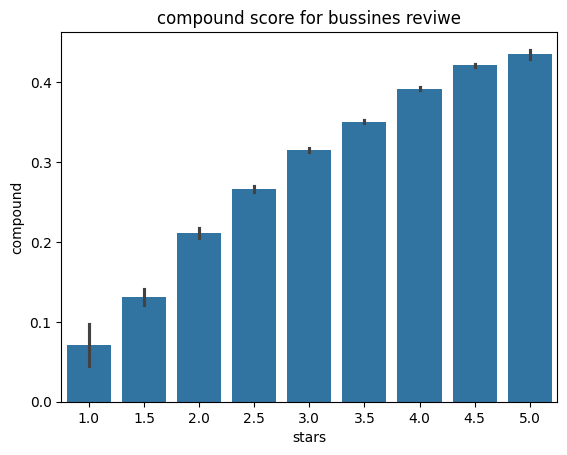

In [30]:
ax = sns.barplot(data=merged_data, x='stars',y= 'compound')
ax.set_title("compound score for bussines reviwe")
plt.show()

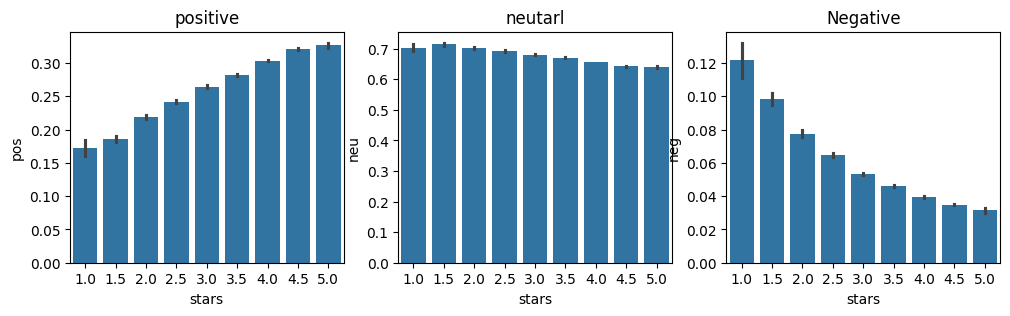

In [31]:
fig,axs = plt.subplots(1,3,figsize = (12,3))
sns.barplot(data=merged_data, x= 'stars',y ='pos',ax = axs[0])
sns.barplot(data=merged_data, x= 'stars',y ='neu',ax = axs[1])
sns.barplot(data=merged_data, x= 'stars',y ='neg',ax = axs[2])
axs[0].set_title("positive")
axs[1].set_title("neutarl")
axs[2].set_title("Negative")
plt.show()

In [32]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load('en_core_web_sm')


In [34]:


# Initialize Matcher
matcher = Matcher(nlp.vocab)
# Define patterns to extract aspects (example patterns)




In [42]:

patterns = [
    {"label": "PRODUCT", "pattern": [{"POS": "NOUN"}, {"OP": "*"}]}  # Example pattern to match nouns and optional subsequent tokens
]
patterns


[{'label': 'PRODUCT', 'pattern': [{'POS': 'NOUN'}, {'OP': '*'}]}]

user_id	neg	neu	pos	compound	business_id	name	address	city	state	longitude	stars	review_count	is_open	attributes	categories	hours	text	date	compliment_count

In [50]:
g_data = merged_data[['user_id','neg','neu','pos','compound','business_id','name','city','stars','text','date']]

In [55]:
g_data.to_csv('data.csv', index=False)

In [62]:
import re
aspects = ['Food Quality', 'Service', 'Ambiance', 'Pricing', 'Cleanliness']

# Function to classify text into aspects
def classify_aspect(text):
    for aspect in aspects:
        if re.search(aspect, text, re.IGNORECASE):
            return aspect
    return 'Other'

In [69]:
def get_sentiment_score(text):
    if pd.isna(text):
        return 0.0
    sentiment = sen.polarity_scores(text)
    return sentiment['compound']

In [70]:
data['text'] = data['text'].fillna('')

In [71]:
data['aspect'] = data['text'].apply(classify_aspect)

In [64]:
def get_sentiment_score(text):
    sentiment = sen.polarity_scores(text)
    return sentiment['compound']

In [72]:
data['text'] = data['text'].astype(str)

In [74]:
data['aspect'] = data['text'].apply(classify_aspect)

In [75]:
data['sentiment_score'] = data['text'].apply(get_sentiment_score)

In [76]:
aspect_sentiment_data = data[['user_id', 'aspect', 'sentiment_score']]

In [77]:
aspect_sentiment_data.to_csv('aspect_sentiment.csv', index=False)

In [78]:
aspect_sentiment_data

,user_id,aspect,sentiment_score
0,trf3Qcz8qvCDKXiTgjUcEg,Other,0.1779
1,trf3Qcz8qvCDKXiTgjUcEg,Other,-0.2960
2,trf3Qcz8qvCDKXiTgjUcEg,Other,0.5411
3,trf3Qcz8qvCDKXiTgjUcEg,Other,0.3182
4,trf3Qcz8qvCDKXiTgjUcEg,Other,0.0000
...,...,...,...
908910,sqKWVIMXm1RGAlvVQYaiHw,Other,0.0000
908911,s6CilHlWWxqbu3Mr2r8MXg,Service,0.5719
908912,a-EQKCGPirfEd33MkbD4ug,Other,0.8555
908913,dp7hYl5O3_o3b4Bta8_25g,Other,0.4295
